In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [3]:
gaming= pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
gaming.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


First let's see missing values in our data set

In [4]:
gaming.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
nan_year=gaming[pd.isnull(gaming.Year)]
nan_year.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [6]:
nan_publisher=gaming[pd.isnull(gaming.Publisher)]
print('Total global sales of entries with missing data: ' + str(round(nan_publisher.Global_Sales.sum(),2)))
print('Percentage of missing publishers\' data to global sales ' + str(round(nan_publisher.Global_Sales.sum()/gaming.Global_Sales.sum(), 4)) )

Total global sales of entries with missing data: 14.88
Percentage of missing publishers' data to global sales 0.0017


Let's handle missing values of the data by two methods. With year of a game we will fill NaN values with mode, or with the most frequent data point in column year.

In [7]:
gaming_df = gaming.copy()
gaming_df['Year'].fillna(gaming_df['Year'].mode()[0], inplace=True)

Let's fill missing publishers data with 'Unknown'

In [8]:
gaming_df['Publisher']=gaming_df['Publisher'].fillna('Unknown')
gaming_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Next step: setup and import packages for graphs

In [9]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0, 0.5, 'Global sales')

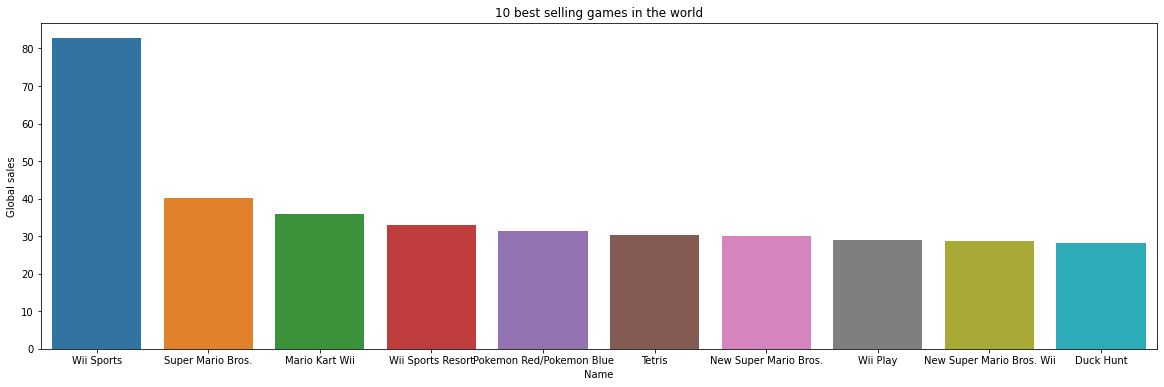

In [11]:
plt.figure(figsize=(20,6))
plt.title('10 best selling games in the world')
sns.barplot(x=gaming['Name'][0:10], y=gaming_df['Global_Sales'][0:10],)
plt.ylabel('Global sales')

Text(0.5, 1.0, 'Global sales by platform')

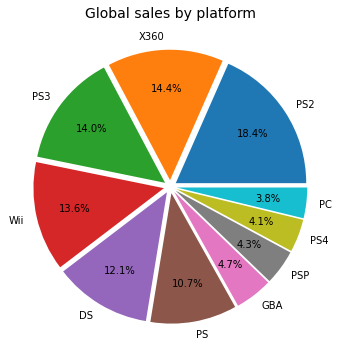

In [25]:
platform_pie = gaming_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)[0:10]
pie, ax=plt.subplots(figsize=[10,6])
labels = platform_pie.keys()
plt.pie(x=platform_pie, autopct="%.1f%%", labels=labels, explode = [0.05]*10, pctdistance=0.7)
plt.title('Global sales by platform', fontsize =14)

           Genre  Global_Sales
0         Action       1751.18
1         Sports       1330.93
2        Shooter       1037.37
3   Role-Playing        927.37
4       Platform        831.37
5           Misc        809.96
6         Racing        732.04
7       Fighting        448.91
8     Simulation        392.20
9         Puzzle        244.95
10     Adventure        239.04
11      Strategy        175.12


Text(0, 0.5, 'Global sales')

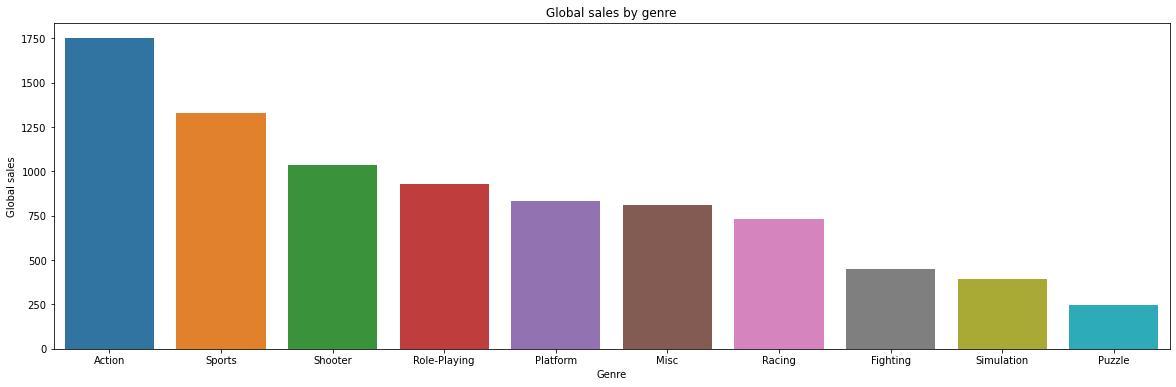

In [43]:
genres=gaming_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genres=genres.to_frame().reset_index()
print(genres)
plt.figure(figsize=(20,6))
plt.title('Global sales by genre')
sns.barplot(x=genres['Genre'][0:10], y=genres['Global_Sales'][0:10],)
plt.ylabel('Global sales')

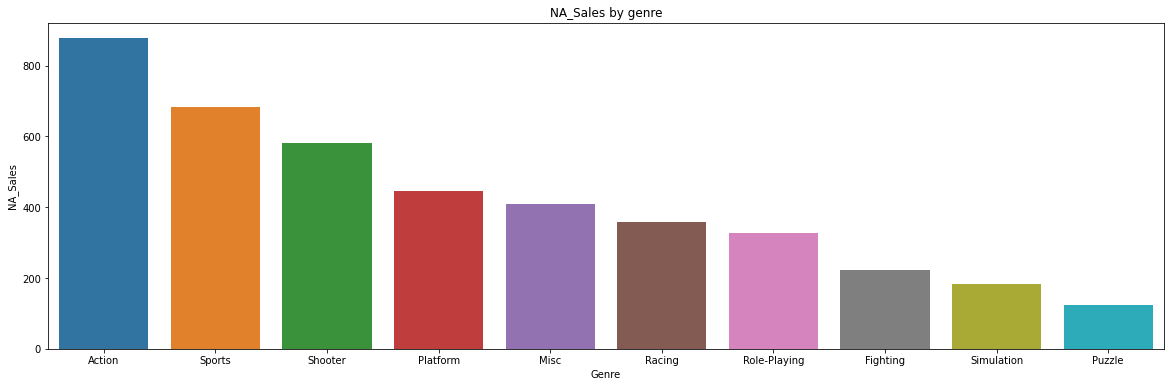

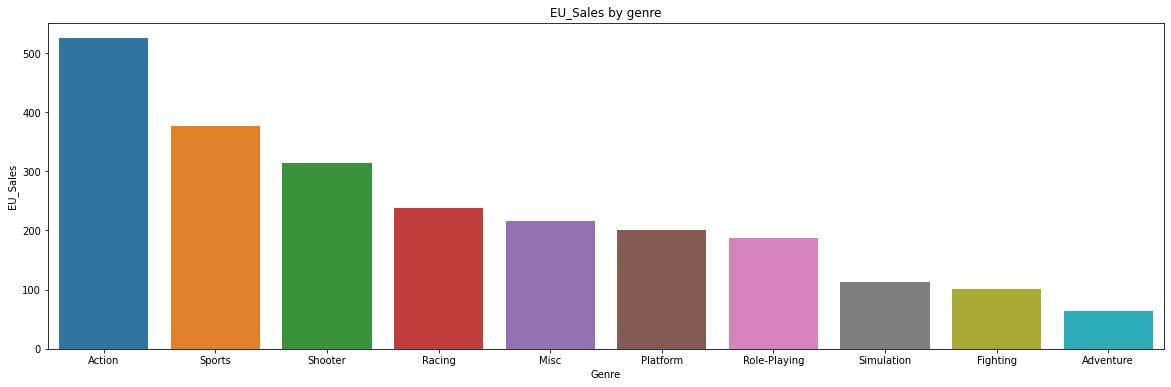

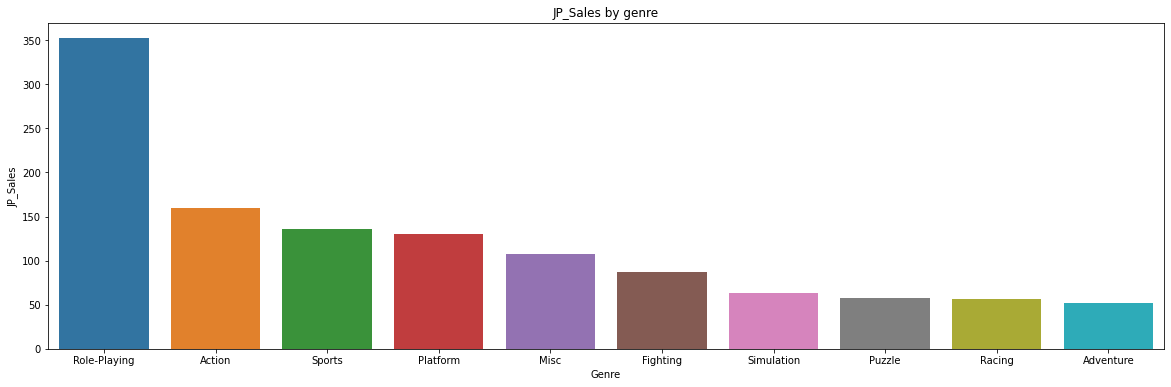

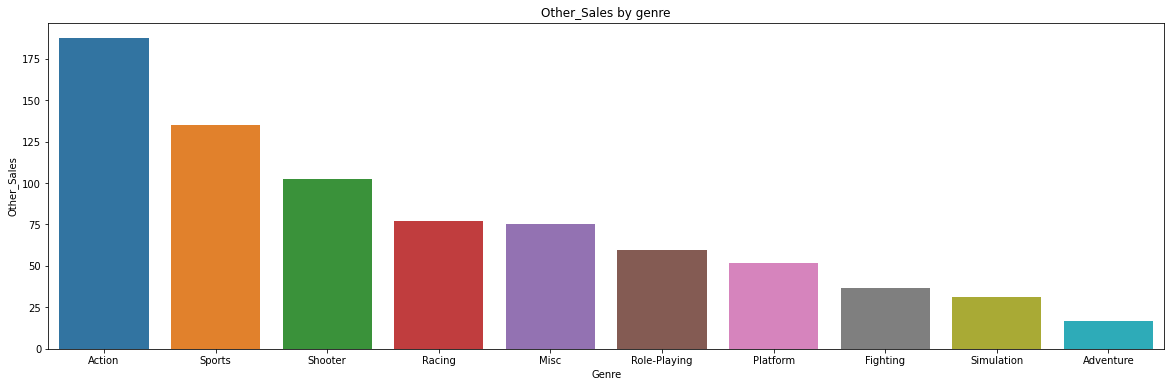

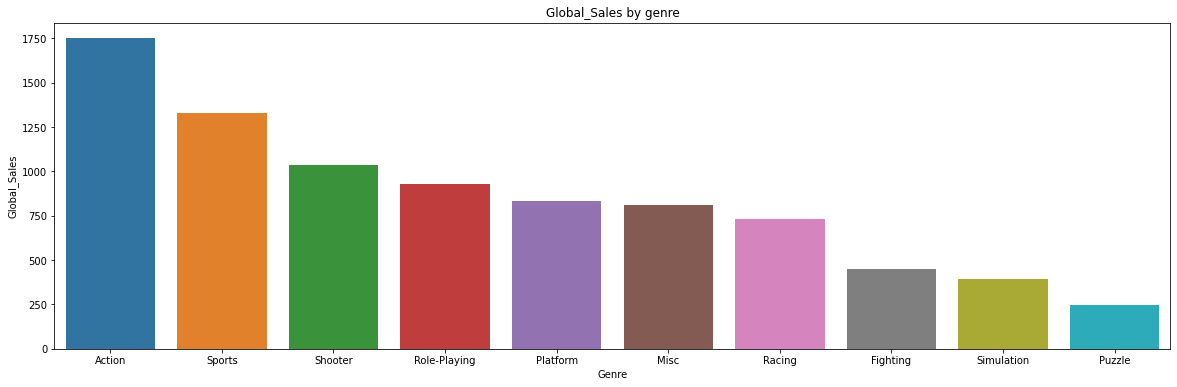

In [67]:
for i in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']:
    genres=gaming_df.groupby('Genre')[i].sum().sort_values(ascending=False)
    genres=genres.to_frame().reset_index()
    plt.figure(figsize=(20,6))
    plt.title(i+' by genre')
    sns.barplot(x=genres['Genre'][0:10], y=genres[i][0:10],)
    plt.ylabel(i)

In [56]:
publisher_sales=gaming.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False)
publisher_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,595.07,371.27,14.04,129.77,1110.32
Activision,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
Ubisoft,253.43,163.32,7.50,50.26,474.72


In [65]:
sales_byregion=round(gaming[['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']].sum()/gaming['Global_Sales'].sum(),2)
sales_byregion.head()

NA_Sales        0.49
EU_Sales        0.27
JP_Sales        0.14
Other_Sales     0.09
Global_Sales    1.00
dtype: float64